In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('youtube_ad_revenue_dataset.csv')
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [3]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


In [4]:
df.dtypes

video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [6]:
df.duplicated().sum()

np.int64(2400)

In [7]:
df=df.drop_duplicates()

In [8]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6000
comments                6000
watch_time_minutes      6000
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [9]:
#Likes,Comments,Watchtime- 6000 missing values → about 4.8% of dataset (122k rows)
df['likes']=df['likes'].fillna(0)
df['comments']=df['comments'].fillna(0)
df['watch_time_minutes']=df['watch_time_minutes'].fillna(df['watch_time_minutes'].median())


C:\Users\sripe\AppData\Local\Temp\ipykernel_10160\3838499169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['likes']=df['likes'].fillna(0)
C:\Users\sripe\AppData\Local\Temp\ipykernel_10160\3838499169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].fillna(0)
C:\Users\sripe\AppData\Local\Temp\ipykernel_10160\3838499169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [10]:
df.isnull().sum()

video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,0.0,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


#Numerical features

In [13]:
num_feat=df.select_dtypes(exclude=object)
num_feat

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
0,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237
1,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508
2,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008
3,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261
4,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388
...,...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.704885,25.490195,210818,280.986396
122396,10128,1709.0,63.0,57563.703040,16.229133,878860,354.612981
122397,10267,700.0,0.0,27549.714659,23.822365,576756,203.643106
122398,10240,1616.0,106.0,56967.384382,7.753099,585138,351.525811


#Categorical features

In [14]:
cat_feat=df.select_dtypes(include=object)
cat_feat

,video_id,date,category,device,country
0,vid_3092,2024-09-24 10:50:40.993199,Entertainment,TV,IN
1,vid_3459,2024-09-22 10:50:40.993199,Gaming,Tablet,CA
2,vid_4784,2024-11-21 10:50:40.993199,Education,TV,CA
3,vid_4078,2025-01-28 10:50:40.993199,Entertainment,Mobile,UK
4,vid_3522,2025-04-28 10:50:40.993199,Education,Mobile,CA
...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,Education,Tablet,US
122396,vid_3890,2024-07-13 10:50:40.993199,Music,Desktop,UK
122397,vid_3934,2024-06-10 10:50:40.993199,Tech,Tablet,CA
122398,vid_4260,2024-12-22 10:50:40.993199,Music,Mobile,UK


## Univaritate Analysis for Num Data

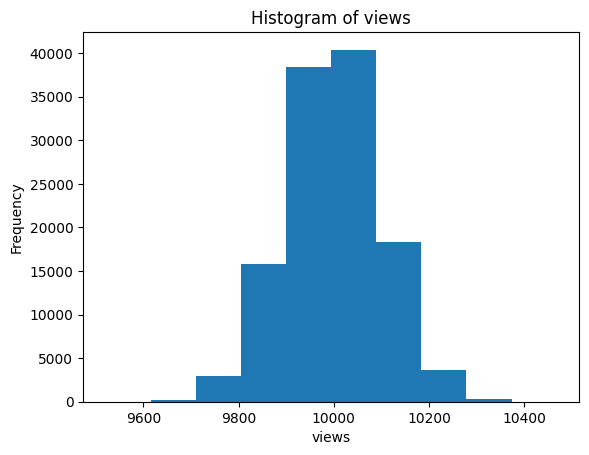

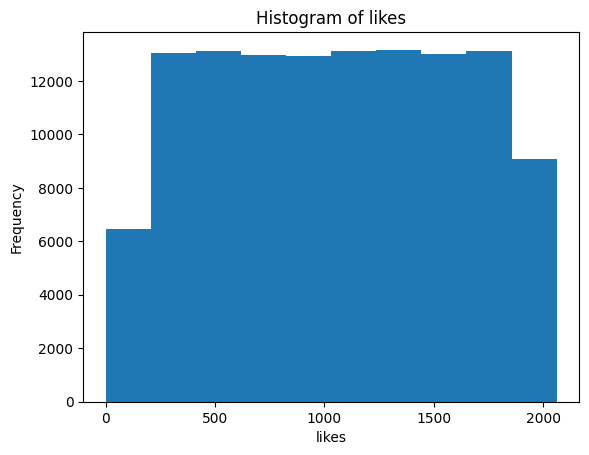

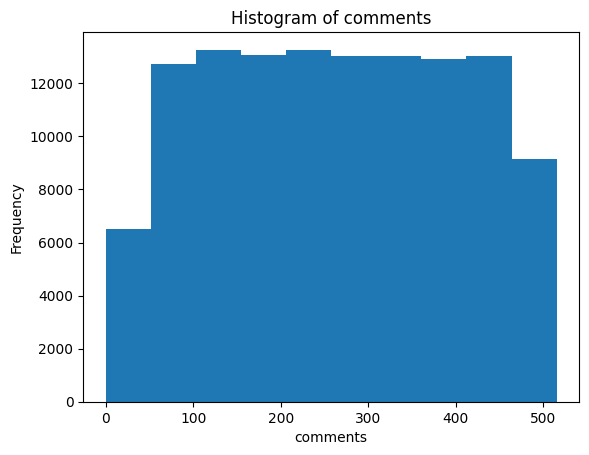

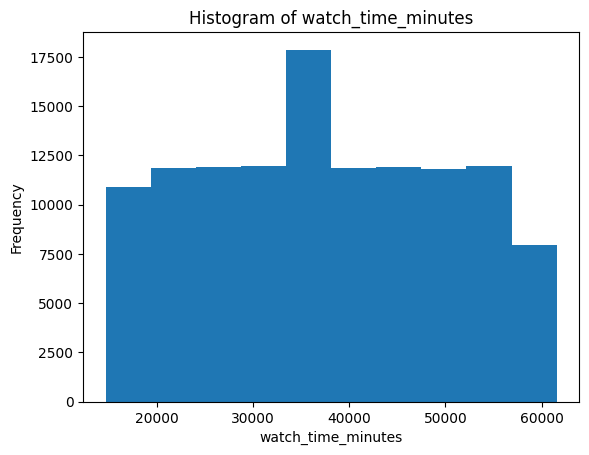

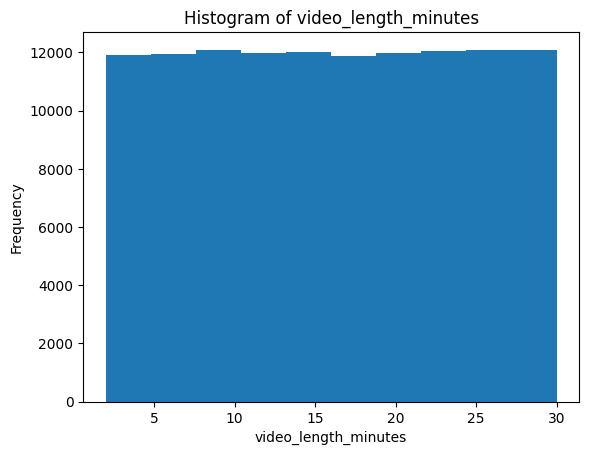

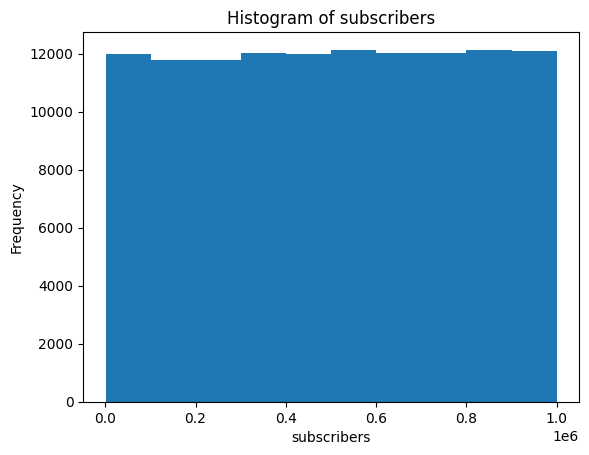

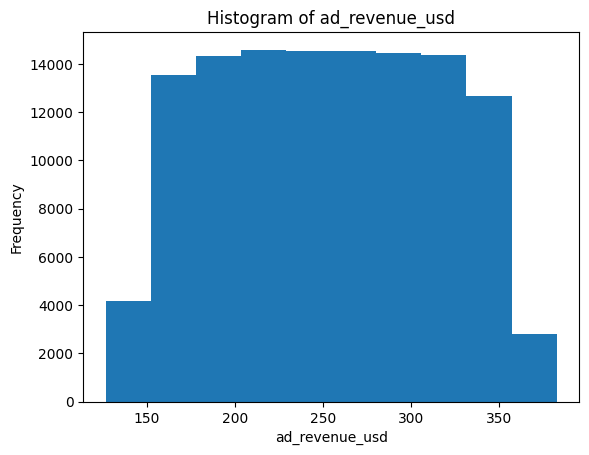

In [15]:
for i in num_feat.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')
    plt.show()


## Univariate for Numerical -> Boxplot

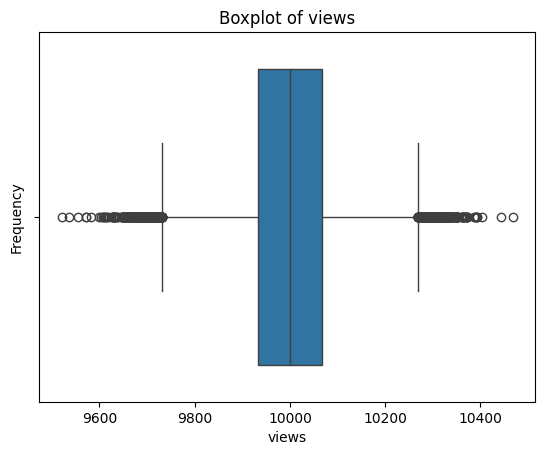

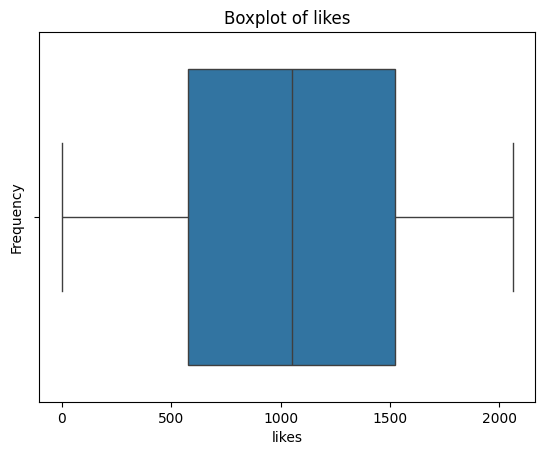

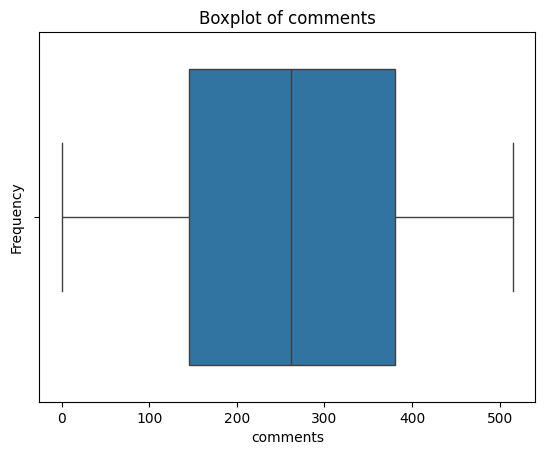

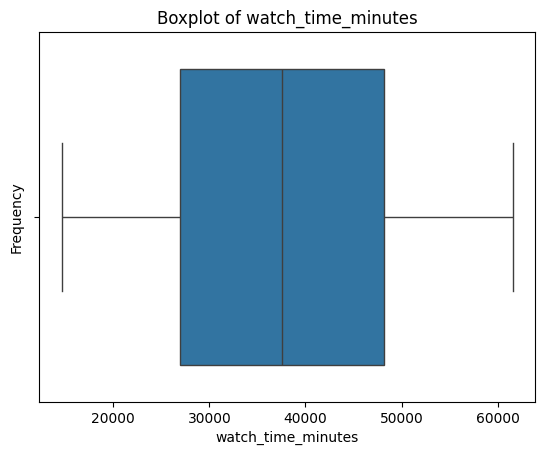

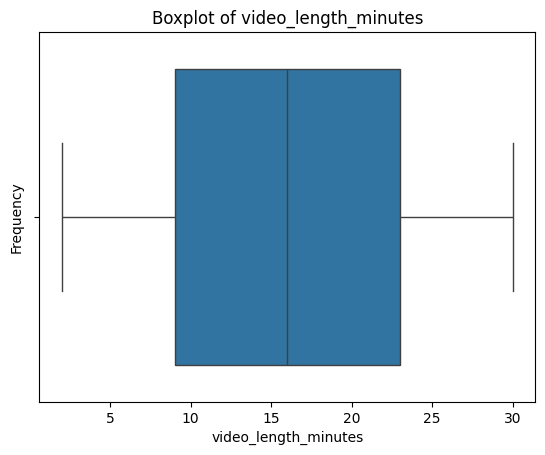

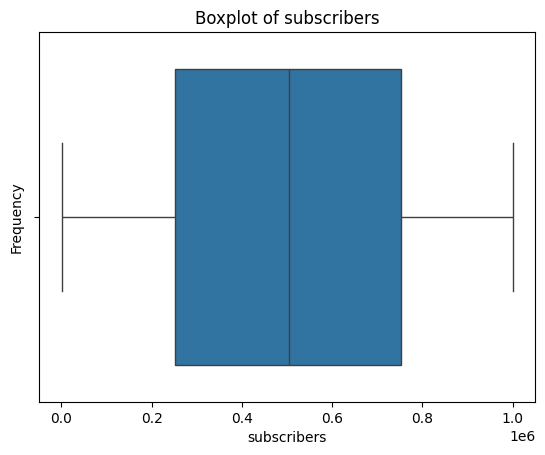

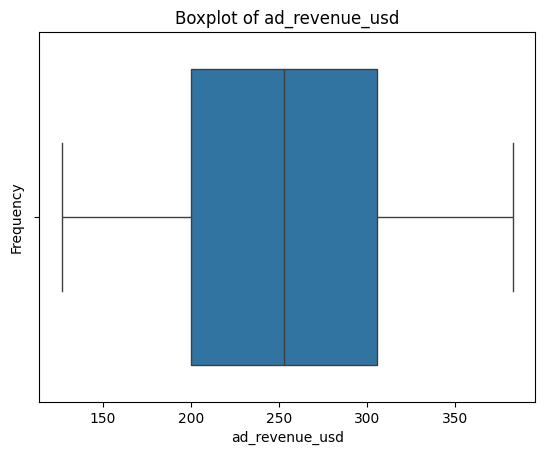

In [16]:
for i in num_feat.columns:
    sns.boxplot(x=df[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Boxplot of {i}')
    plt.show()

## Univariate Analysis for Cat Data - Countplot and Barplot for Categorical features

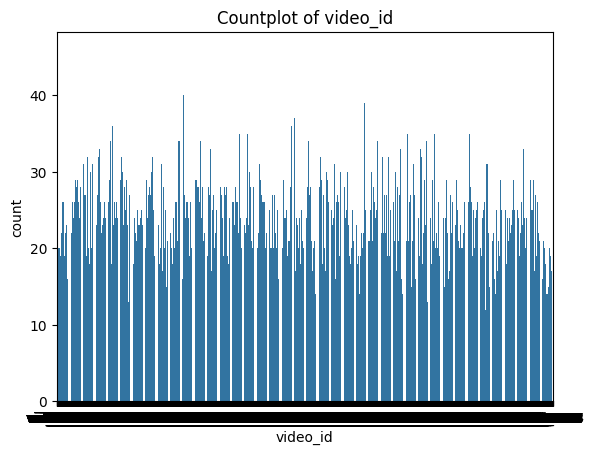

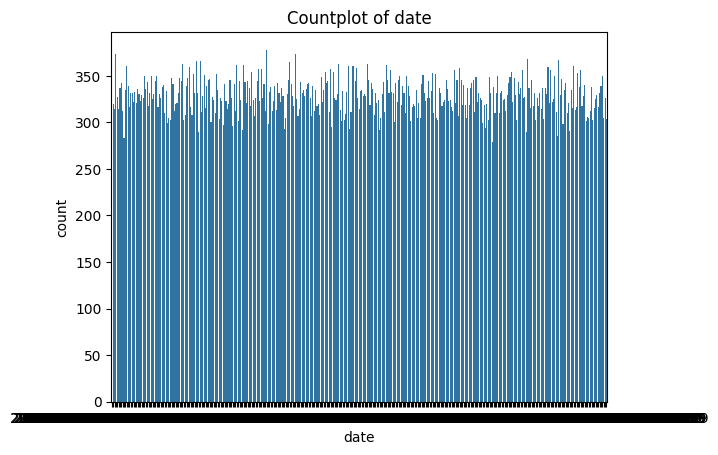

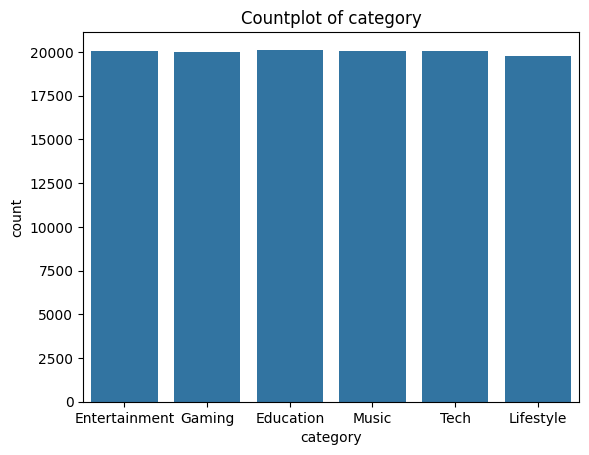

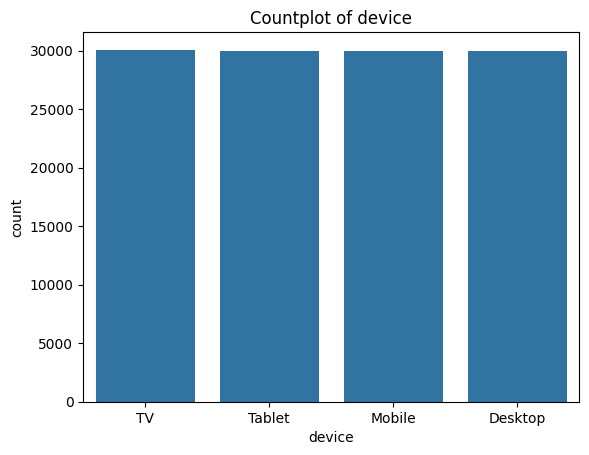

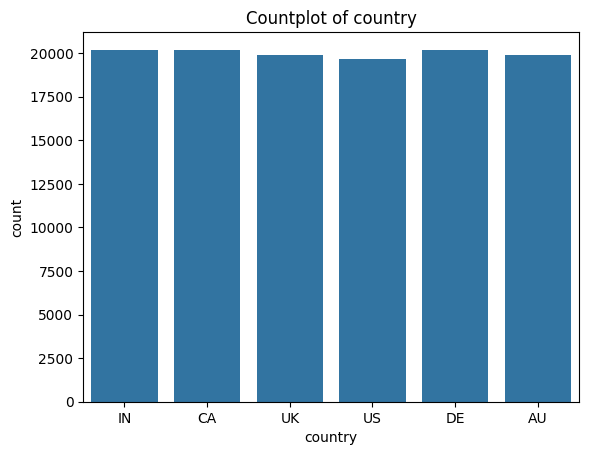

In [17]:
for i in cat_feat.columns:
    sns.countplot(x=i, data=df)
    plt.xlabel(i)
    plt.title(f'Countplot of {i}')
    plt.show()

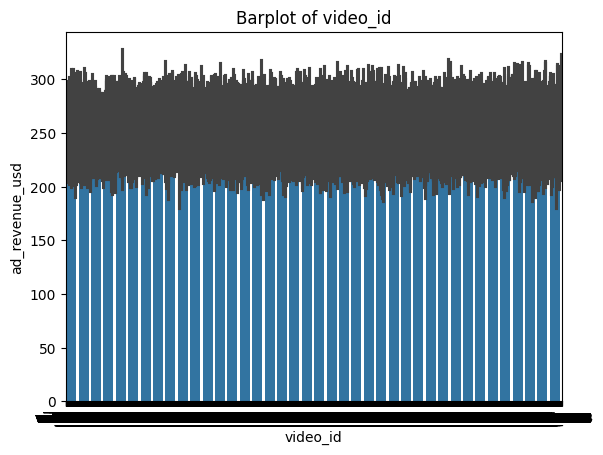

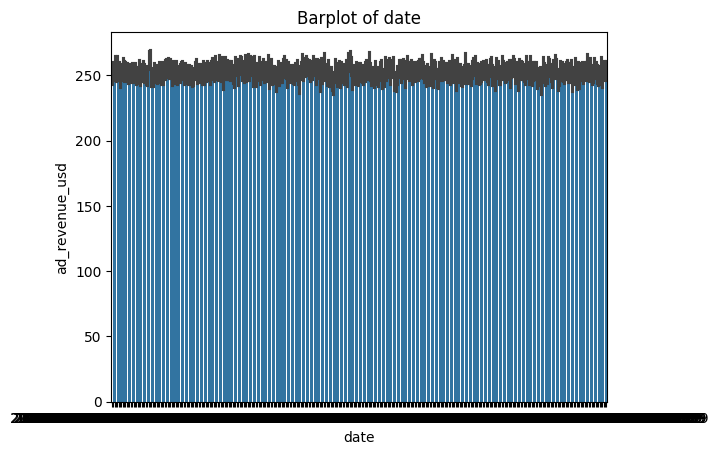

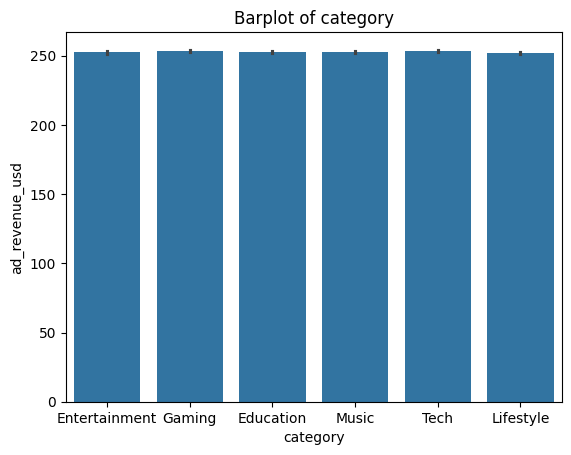

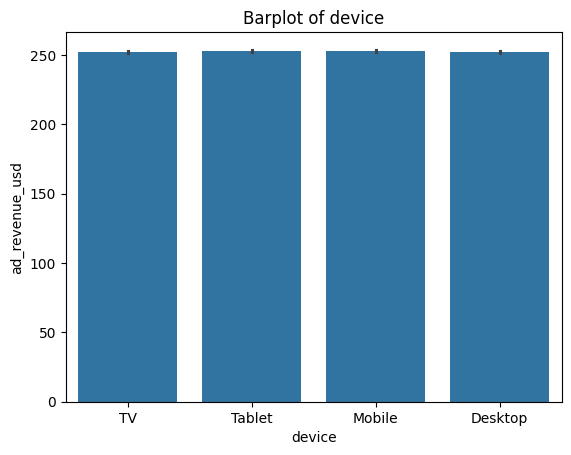

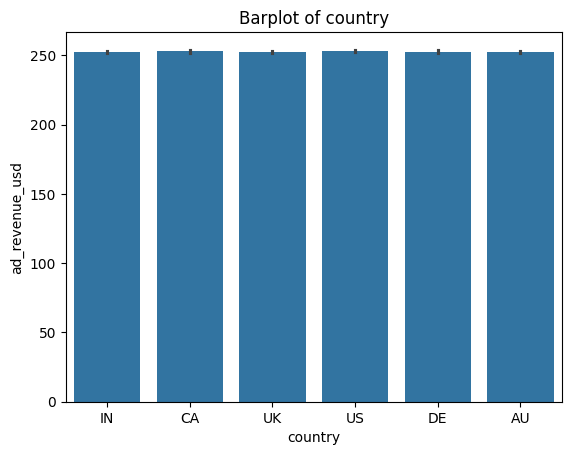

In [18]:
#Barplot

for i in cat_feat.columns:
    sns.barplot(x=i, y='ad_revenue_usd', data=df)
    plt.xlabel(i)
    plt.title(f'Barplot of {i}')
    plt.show()

In [19]:
# Bivariate Analysis

num_feat.corr()['ad_revenue_usd']


views                   0.037942
likes                   0.128878
comments                0.028335
watch_time_minutes      0.964052
video_length_minutes    0.000364
subscribers             0.005065
ad_revenue_usd          1.000000
Name: ad_revenue_usd, dtype: float64

In [20]:
num_feat=num_feat.drop('ad_revenue_usd',axis=1)
num_feat

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers
0,9936,1221.0,320.0,26497.214184,2.862137,228086
1,10017,642.0,346.0,15209.747445,23.738069,736015
2,10097,1979.0,187.0,57332.658498,26.200634,240534
3,10034,1191.0,242.0,31334.517771,11.770340,434482
4,9889,1858.0,477.0,15665.666434,6.635854,42030
...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.704885,25.490195,210818
122396,10128,1709.0,63.0,57563.703040,16.229133,878860
122397,10267,700.0,0.0,27549.714659,23.822365,576756
122398,10240,1616.0,106.0,56967.384382,7.753099,585138


In [21]:
#Feature Eng
# for like, commments we need to fill na
df['engagement_rate']=(df['likes']+df['comments'])/df['views'].replace(0,np.nan).fillna(0)
df['watch_time_ratio']=df['watch_time_minutes']/df['video_length_minutes'].replace(0,np.nan).fillna(0)
df['views_per_min']=df['views']/df['video_length_minutes'].replace(0,np.nan).fillna(0)


C:\Users\sripe\AppData\Local\Temp\ipykernel_10160\1437012525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engagement_rate']=(df['likes']+df['comments'])/df['views'].replace(0,np.nan).fillna(0)
C:\Users\sripe\AppData\Local\Temp\ipykernel_10160\1437012525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['watch_time_ratio']=df['watch_time_minutes']/df['video_length_minutes'].replace(0,np.nan).fillna(0)
C:\Users\sripe\AppData\Local\Temp\ipykernel_10160\1437012525.py:5: SettingWithCopyWarning: 


In [22]:
#Validation of features created
feat_created=df

In [ ]:
#Define X and y
X = df.drop(columns=['ad_revenue_usd', 'video_id', 'date'])
y=df['ad_revenue_usd']


In [24]:
#Train,test, Split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape #shape

((96000, 14), (24000, 14), (96000,), (24000,))

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
import numpy as np

# Numerical and Categorical columns
num_col = X.select_dtypes(exclude='object').columns
cat_col = X.select_dtypes(include='object').columns

# ColumnTransformer: scaling + encoding
Preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ]
)

In [26]:
# Fit the Preprocess on train set and transform both train & test
X_train_transformed = Preprocess.fit_transform(X_train)
X_test_transformed = Preprocess.transform(X_test)

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Train model
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train_transformed, y_train)

# Predictions
y_train_pred = lr.predict(X_train_transformed)
y_test_pred  = lr.predict(X_test_transformed)

# Evaluation
print("📌 Linear Regression")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


📌 Linear Regression
Train R2: 0.9488380165502588
Test R2: 0.945767455741182
Train MAE: 5.878104459697393
Test MAE: 6.030658181407164
Train RMSE: 14.016459730433672
Test RMSE: 14.414945382861967


# Ridge Regression

In [34]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-3, 3, 5))  # fewer alphas → faster
ridge.fit(X_train_transformed, y_train)

y_train_pred = ridge.predict(X_train_transformed)
y_test_pred  = ridge.predict(X_test_transformed)

print("📌 Ridge Regression")
print("Best Alpha:", ridge.alpha_)
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


📌 Ridge Regression
Best Alpha: 1000.0
Train R2: 0.9458905192438569
Test R2: 0.9485355213641445
Train MAE: 5.05702521300432
Test MAE: 4.917508634634647
Train RMSE: 14.414558013786605
Test RMSE: 14.042253220224692


# Lasso Regression

In [31]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=3, alphas=np.logspace(-3, 1, 5), max_iter=1000, random_state=42, n_jobs=-1)
lasso.fit(X_train_transformed, y_train)

y_train_pred = lasso.predict(X_train_transformed)
y_test_pred  = lasso.predict(X_test_transformed)

print("📌 Lasso Regression")
print("Best Alpha:", lasso.alpha_)
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.499e+05, tolerance: 2.457e+04
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+06, tolerance: 2.470e+04
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\sripe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations,

📌 Lasso Regression
Best Alpha: 0.1
Train R2: 0.9458836280618501
Test R2: 0.9487328998419057
Train MAE: 4.979060042171465
Test MAE: 4.832086185115097
Train RMSE: 14.41547587678356
Test RMSE: 14.015299666827168


# Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
rf.fit(X_train_transformed, y_train)

y_train_pred = rf.predict(X_train_transformed)
y_test_pred  = rf.predict(X_test_transformed)

print("📌 Random Forest")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


📌 Random Forest
Train R2: 0.9548597855946446
Test R2: 0.9519614912599307
Train MAE: 3.1058773041292915
Test MAE: 3.455713597113377
Train RMSE: 13.165775822376709
Test RMSE: 13.566810851522902


# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb.fit(X_train_transformed, y_train)

y_train_pred = gb.predict(X_train_transformed)
y_test_pred  = gb.predict(X_test_transformed)

print("📌 Gradient Boosting")
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


📌 Gradient Boosting
Train R2: 0.9525217285139874
Test R2: 0.9519692327286927
Train MAE: 3.5748143492224274
Test MAE: 3.5944195520497195
Train RMSE: 13.502435050618962
Test RMSE: 13.565717652786992


In [35]:
import pandas as pd

# Data dictionary
results = {
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Gradient Boosting", "Random Forest"],
    "Train R2": [0.9488, 0.9459, 0.9459, 0.9525, 0.9549],
    "Test R2": [0.9458, 0.9487, 0.9485, 0.9520, 0.9520],
    "Train MAE": [5.88, 4.98, 5.06, 3.57, 3.11],
    "Test MAE": [6.03, 4.83, 4.92, 3.59, 3.46],
    "Train RMSE": [14.02, 14.42, 14.41, 13.50, 13.17],
    "Test RMSE": [14.41, 14.02, 14.04, 13.57, 13.57]
}

# Create DataFrame
df_results = pd.DataFrame(results)

# Display DataFrame
print(df_results)

               Model  Train R2  Test R2  Train MAE  Test MAE  Train RMSE  \
0  Linear Regression    0.9488   0.9458       5.88      6.03       14.02   
1   Lasso Regression    0.9459   0.9487       4.98      4.83       14.42   
2   Ridge Regression    0.9459   0.9485       5.06      4.92       14.41   
3  Gradient Boosting    0.9525   0.9520       3.57      3.59       13.50   
4      Random Forest    0.9549   0.9520       3.11      3.46       13.17   

   Test RMSE  
0      14.41  
1      14.02  
2      14.04  
3      13.57  
4      13.57  


In [36]:
import joblib
joblib.dump((Preprocess, rf), "model.pkl")   # example: saving Random Forest

['model.pkl']

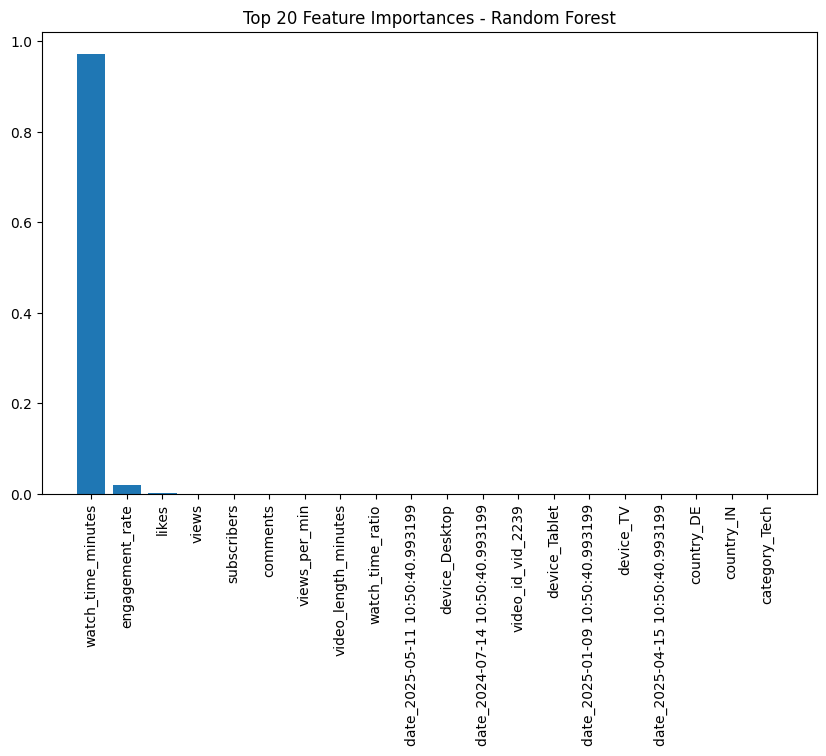

In [37]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = Preprocess.transformers_[0][2].tolist() + list(
    Preprocess.named_transformers_['cat'].get_feature_names_out(cat_col)
)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(20), importances[indices][:20])
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()
